# Relatorio de otimização
* João Vitor Coelho Estrela
* Wanderlei Malaquias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tqdm.notebook import tqdm
from math import ceil

from models.parametros import Parametros
from models.firefly.firefly import FireFly as Fa


KeyboardInterrupt: 

In [2]:
def rosenbrock(chromosome):
    """F8 Rosenbrock's saddle
    multimodal, asymmetric, inseparable"""
    fitness = 0
    for i in range(len(chromosome) - 1):
        fitness += 100 * ((chromosome[i] ** 2) - chromosome[i + 1]) ** 2 + \
                   (1 - chromosome[i]) ** 2
    return fitness

## Parametros gerais

In [3]:
nRep = 50
nPop = 24
nGen = 200
ranges = np.array([[-2, 12]]*30)
func = rosenbrock
data_out = 'ARTIGO_DATA'

In [4]:
paras0 = Parametros(nPop, nGen, 1, ranges, True, func, popType = 0)
paras1 = Parametros(nPop, nGen, 1, ranges, True, func, popType = 1)
paras2 = Parametros(nPop, nGen, 1, ranges, True, func, popType = 2)
paras3 = Parametros(nPop, nGen, 1, ranges, True, func, popType = 3)
paras4 = Parametros(nPop, nGen, 1, ranges, True, func, popType = 4)

In [2]:
x = np.random.normal(size=(2,2))
x

array([[ 0.60829352, -0.18775733],
       [ 0.2241087 ,  1.56052638]])

In [4]:
r,c = (5,10)
r,c

(5, 10)

In [7]:

try:
    x[r,c] = 3
except IndexError:
    r0,c0 = x.shape
    r_ = r+1-r0
    c_ = c+1-c0
    if r > 0:
        x = np.concatenate([x,np.zeros((r_,x.shape[1]))], axis = 0)
    if c > 0:
        x = np.concatenate([x,np.zeros((x.shape[0],c_))], axis = 1)

In [8]:
x

array([[ 0.60829352, -0.18775733,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.2241087 ,  1.56052638,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

## Teste para FA

In [5]:
metas = { 'Fa'         : [Fa(paras0, alpha0 = 1, beta0 = 1, gama0 = None, tetha0 = 0.95, exp0 = 2) for i in range(nRep)],
          'Fa_OpSort'  : [Fa(paras1, alpha0 = 1, beta0 = 1, gama0 = None, tetha0 = 0.95, exp0 = 2) for i in range(nRep)],
          'Fa_Op'      : [Fa(paras2, alpha0 = 1, beta0 = 1, gama0 = None, tetha0 = 0.95, exp0 = 2) for i in range(nRep)],
          'Fa_Quasi13' : [Fa(paras3, alpha0 = 1, beta0 = 1, gama0 = None, tetha0 = 0.95, exp0 = 2) for i in range(nRep)],
          'Fa_Quasi123': [Fa(paras4, alpha0 = 1, beta0 = 1, gama0 = None, tetha0 = 0.95, exp0 = 2) for i in range(nRep)]}

In [6]:
for k, tipo in metas.items():
    for rep in tqdm(tipo, desc=k, unit='Reps'):
        for g in rep:
            pass

## Recuperando as infos:
Para cada repetição de cada metaheurística é preciso obter os objetos partículas instanciados.
* pBets -> Partícula que representa o melhor valor encontrado (pode divergir do melhor da pList).
* pList -> Lista contendo todas partículas do enxame.

Os objetos partículas possuem os seguintes atributos:

* value -> Um array (nGen) contendo todos valores durante a repetição em questão.
* ch -> Um array (nGen, nVar) contendo todos valores durante a repetição em questão.

### pBests:
Para isso é obtido cada objeto particula instanciado como pBest em cada repetição de cada metaheuristica

In [7]:
pBests = {mName: [m.pBest for m in metas] for mName, metas in metas.items()}
for pBs in pBests.values():
    pBs.sort(key=lambda p: p.value[-1])

In [8]:
pBestsV = {mName: np.vstack([v.value for v in pB]) for mName, pB in pBests.items()}
pBestsX = {mName: np.vstack([v.ch[-1, :] for v in pB]) for mName, pB in pBests.items()}

In [9]:
pd.DataFrame(pBestsV['Fa']).head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,6.330778e+06,...,14297.663172,14297.663172,14297.663172,14297.663172,14297.663172,14297.663172,14297.663172,14297.663172,14297.663172,14297.663172
1,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,5.974641e+06,...,20656.033122,20656.033122,20656.033122,20656.033122,20656.033122,20656.033122,20656.033122,20656.033122,20656.033122,20656.033122
2,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,7.421490e+06,...,21197.382203,21197.382203,21197.382203,21197.382203,21197.382203,21197.382203,21197.382203,21197.382203,21197.382203,21197.382203
3,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,6.302444e+06,...,22059.459129,22059.459129,22059.459129,22059.459129,22059.459129,22059.459129,22059.459129,22059.459129,22059.459129,22059.459129
4,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,6.372784e+06,...,24165.671353,24165.671353,24165.671353,24165.671353,24165.671353,24165.671353,24165.671353,24165.671353,24165.671353,24165.671353


In [10]:
pd.DataFrame(pBestsX['Fa']).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.006218,0.565562,-2.025041,1.477892,-0.598179,0.114470,-1.731850,0.425919,-1.561529,-0.101767,...,0.650110,-2.302388,-0.156623,-0.580138,0.172374,-1.378027,-0.980662,0.339637,0.938237,3.097702
1,1.533306,0.684839,0.327051,-0.222429,2.215581,0.770508,1.035516,1.654095,2.095263,0.838839,...,0.858511,-0.469742,-0.373458,1.193044,-1.498254,1.455750,-1.804113,-1.813479,1.493869,4.103659
2,0.573981,0.040162,0.434592,-2.512145,0.046488,1.100667,-1.417220,0.213525,2.133065,1.376053,...,1.900325,0.168548,2.162931,1.745288,1.240313,-0.856723,-0.493995,0.181880,-0.263194,1.633183
3,0.332849,-1.262015,1.423565,2.731240,1.152945,-1.496920,-0.605469,0.797730,1.619865,2.647232,...,1.748894,0.860582,1.183251,-2.603860,1.310179,-2.234314,0.108997,-0.581816,-0.053755,-1.785330
4,-1.519924,0.790451,1.752164,-1.194932,-0.235375,-2.294351,1.148830,2.932627,1.570730,0.423634,...,1.583403,1.577682,-1.416229,0.004062,0.197429,-2.015121,-0.653874,-0.311441,-1.515217,-1.513897


#### Resultados finais de cada metaheuristica para cada repetição:
* Ultima coluna da tabela de fo

In [11]:
pBestsFinal = {mName: np.hstack([v.value[-1] for v in pB]) for mName, pB in pBests.items()}
pd.DataFrame(pBestsFinal)

,Fa,Fa_OpSort,Fa_Op,Fa_Quasi13,Fa_Quasi123
0,14297.663172,15653.297639,12614.233407,13216.815439,11213.646667
1,20656.033122,19243.575390,13733.353144,18727.159125,22296.661768
2,21197.382203,19334.753914,15825.822979,19532.786006,24390.298065
3,22059.459129,24080.036642,20163.778268,21613.816255,24772.647062
4,24165.671353,24783.692289,22015.588515,23015.378336,26107.594827
5,26112.266383,26946.638026,23467.385062,27148.665572,26184.431533
6,26347.867219,30362.954522,24032.216265,29748.988689,27542.769479
7,26798.326935,33216.669552,26283.822872,31681.974259,28239.533521
8,27221.065565,33217.958569,27911.556351,31775.140915,29161.304311
9,31651.855663,35170.838552,35823.980559,36069.553492,32382.419016


#### Exportando para Excel

In [12]:
if not os.path.exists(data_out):
    os.makedirs(data_out)

In [13]:
writer = pd.ExcelWriter(data_out+'/pBests.xlsx', engine='xlsxwriter')

for k, v in pBestsV.items():
    df = pd.DataFrame(v)
    df.to_excel(writer, k)

for k, v in pBestsX.items():
    df = pd.DataFrame(v)
    df.to_excel(writer, k+' X')

writer.save()

### pLists:
Para isso é obtido cada objeto particula instanciado como pBest em cada repetição de cada metaheuristica

In [14]:
#ANALISES DAS POP

## Plotagens:

In [15]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(pBestsV), 'Paired')

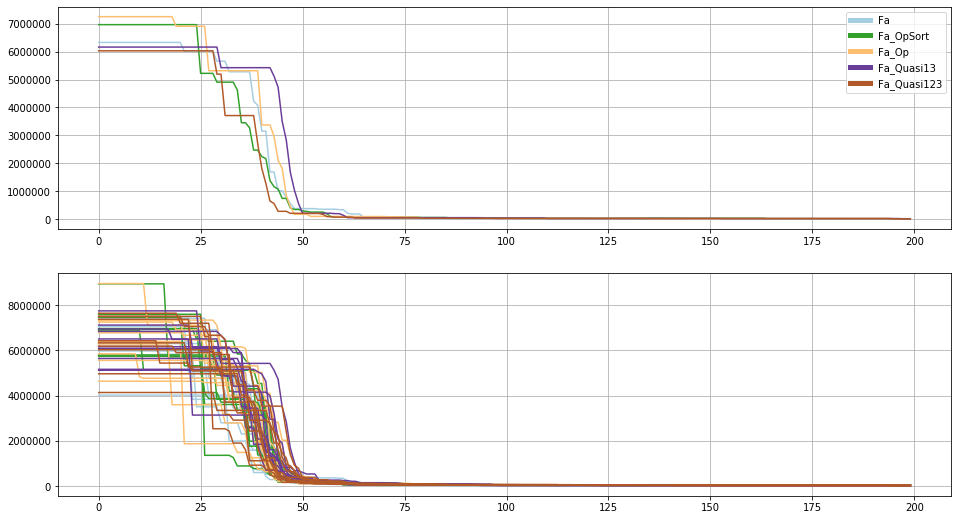

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize= (16,9))

for i, (k, v) in enumerate(pBestsV.items()):
    ax1.plot(v[0].T, c = cmap(i))
    ax1.plot([], [], label = k, c = cmap(i), lw = 5)
    
    ax2.plot(v.T, c = cmap(i))

#ax1.set_yscale('log')
#ax2.set_yscale('log')
ax1.grid()
ax2.grid()
ax1.legend()

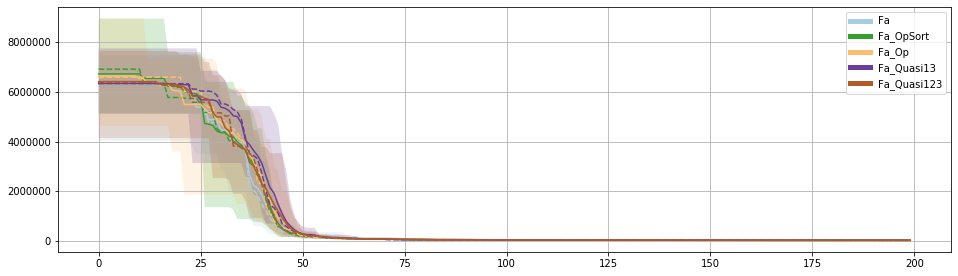

In [17]:
fig, ax = plt.subplots(figsize=(16, 4.5))

for i, (k, v) in enumerate(pBestsV.items()):
    df = pd.DataFrame(v)

    cor = cmap(i)
    x = np.arange(v.shape[1])
    
    #ax.set_yscale('log')
    ax.grid()
    ax.plot([], [], lw=5,label = k, c=cor)
    
    ax.plot(df.mean(), '-',c=cor)
    ax.plot(df.median(), '--', c=cor)
    ax.fill_between(x, df.quantile(0.25), df.quantile(0.75), alpha=0.2, facecolor=cor, linewidth=0)
    
    ax.fill_between(x, df.quantile(0.75), df.quantile(1), alpha=0.2, facecolor=cor, linewidth=0)
    ax.fill_between(x, df.quantile(0), df.quantile(0.25), alpha=0.2, facecolor=cor, linewidth=0)

ax.legend()


[Text(0, 0, 'Fa'),
 Text(0, 0, 'Fa_OpSort'),
 Text(0, 0, 'Fa_Op'),
 Text(0, 0, 'Fa_Quasi13'),
 Text(0, 0, 'Fa_Quasi123')]

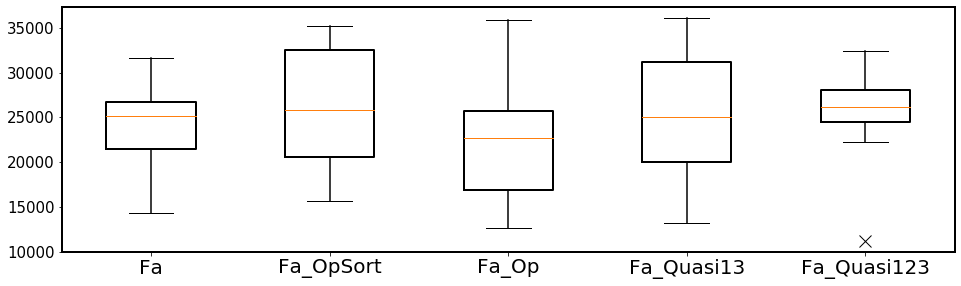

In [18]:
fig, ax = plt.subplots( figsize=(16, 4.5))

flierprops = dict(marker='x', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

ax.boxplot(pBestsFinal.values(), flierprops=flierprops, boxprops= dict(linewidth=2.0, color='black'),
           whiskerprops=dict(linestyle='-',linewidth=1.5, color='black'))

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xticklabels(pBestsFinal.keys(), fontsize=20)

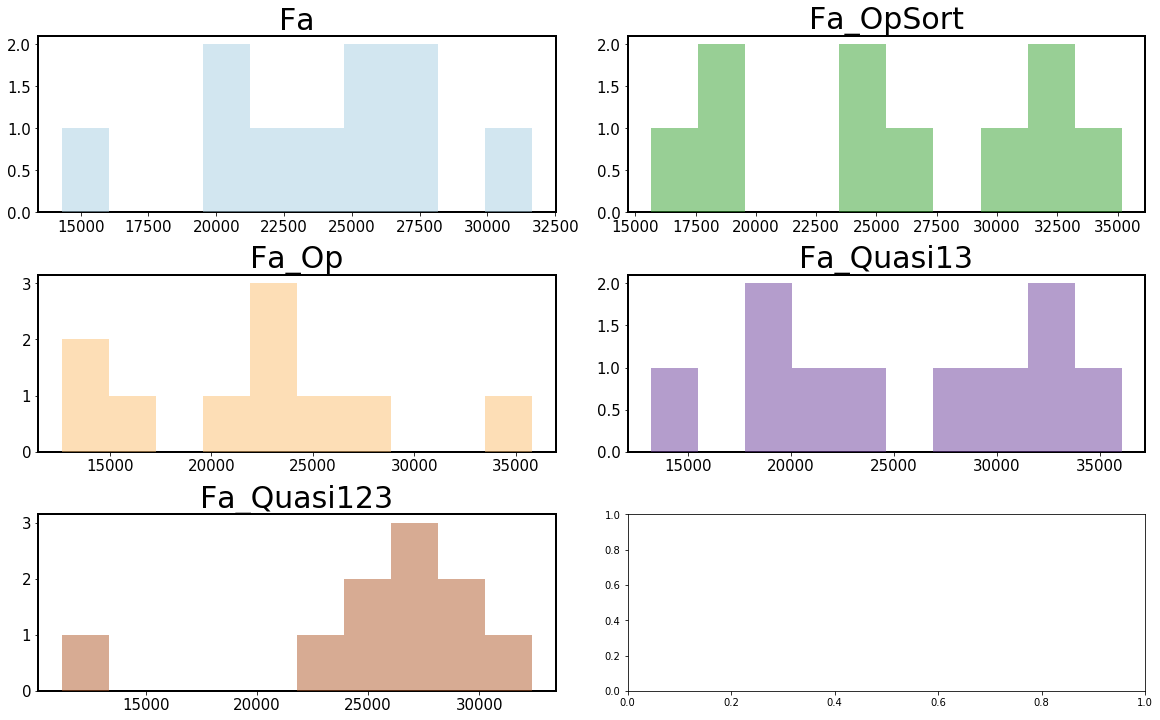

In [19]:

widths = [1, 1]
heights = [1]*ceil(len(pBestsFinal)/2)
gs_kw = dict(width_ratios=widths, height_ratios=heights)

fig, f_axes = plt.subplots(figsize= (16, 16/1.618),ncols=len(widths),
                           nrows=len(heights), constrained_layout=True, gridspec_kw=gs_kw)

for i, (ax, (k, meta)) in enumerate(zip(f_axes.flat, pBestsFinal.items())):
    ax.hist(meta, label = k, bins = 10, alpha = 0.5, color=cmap(i))

    ax.set_title(k, fontsize = 30)

    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth(2)

    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)